## Given dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('Heart.csv')   #reads the csv file i.e., loads the data into a dataframe

In [ ]:
df.shape                   # tells number of rows and columns

(918, 12)

In [9]:
df.head()     # displays first 5 rows of the dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()                  #gives a summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


From the info part :-

-No missing values (0 missing cells).
-Numeric columns found: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease.
-Non-numeric columns: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope.


In [ ]:
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
df['ChestPainType'] = df['ChestPainType'].replace({'ASY': 0 , 'ATA': 1, 'NAP': 2,'TA':3 })
df['RestingECG'] = df['RestingECG'].replace({'LVH': 0 , 'Normal': 1, 'ST': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 1 , 'N': 0})
df['ST_Slope'] = df['ST_Slope'].replace({'Down': 0 , 'Up': 1, 'Flat': 2})


In [50]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,1,0
1,49,0,2,160,180,0,1,156,0,1.0,2,1
2,37,1,1,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,1,108,1,1.5,2,1
4,54,1,2,150,195,0,1,122,0,0.0,1,0


In [ ]:
df.describe()
# gives more concise statistics about the numerical columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
df.duplicated().sum()
# therefore no duplicate values also

np.int64(0)

## Outliers treatment(CHOLESTROL)

Text(0, 0.5, 'Count')

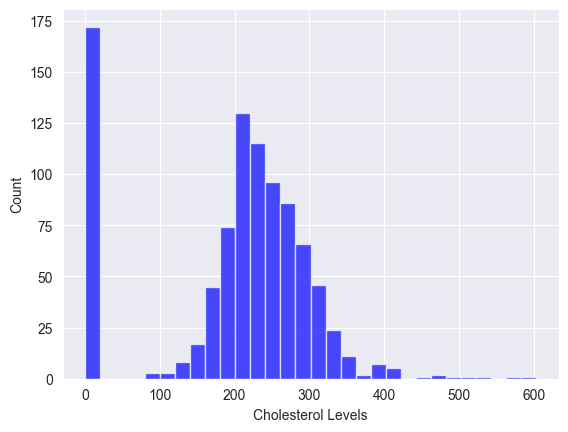

In [23]:
sns.set_style('darkgrid')
plt.hist(df.Cholesterol, bins=30, color='blue', alpha=0.7)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')

In [54]:
df['Cholesterol'].median()

np.float64(223.0)

In [ ]:
# Replace zeros with median value
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df['Cholesterol'].median()

In [ ]:
df.Cholesterol.value_counts()

In [74]:
lower = 100   
upper = 400   
df['Cholesterol'] = np.clip(df['Cholesterol'], lower, upper)  # Cap values outside the range to lower and upper bounds

Text(0, 0.5, 'Count')

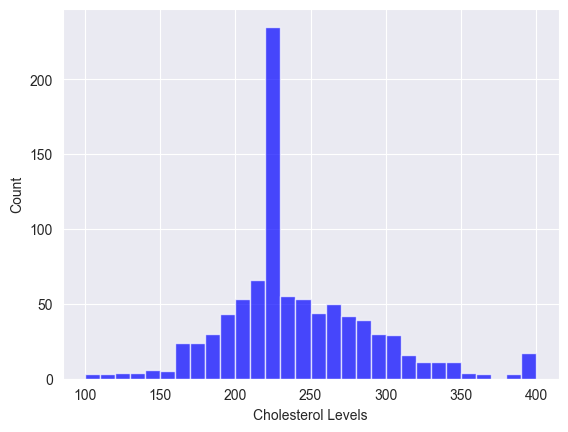

In [86]:
plt.hist(df.Cholesterol, bins=30, color='blue', alpha=0.7)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')

## RestingBP outliers


In [ ]:
df.RestingBP.unique()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,  10.,  34.,  80.,  34., 194., 165.,  71., 153.,
         64.,  17.,  53.,  16.,   4.,  13.,   3.,   4.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

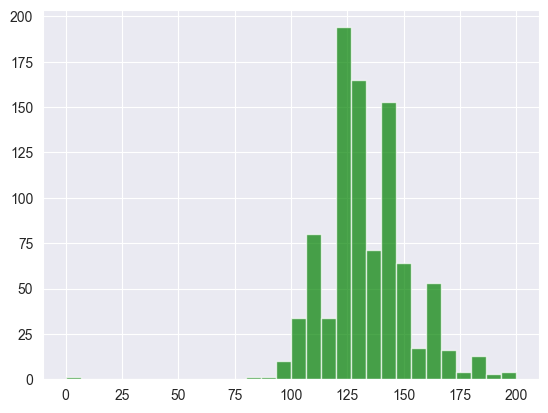

In [65]:
plt.hist(df.RestingBP, bins=30, color='green', alpha=0.7)

In [68]:
# Replace zeros with median value
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()

In [ ]:
df['RestingBP'] = np.clip(df['RestingBP'], 90, 180)  # Cap values outside the range to lower and upper bounds

Text(0, 0.5, 'Count')

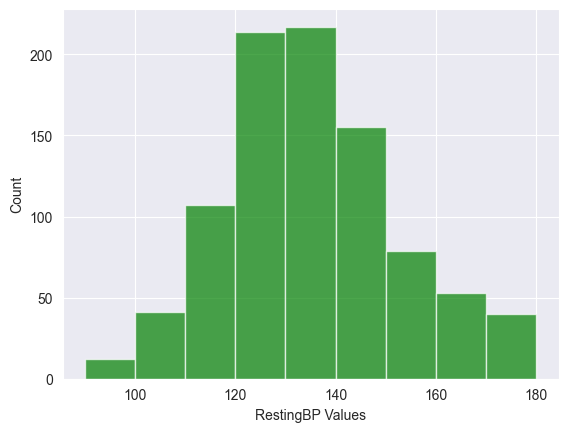

In [85]:
plt.hist(df.RestingBP, bins=[90, 100, 110, 120, 130, 140, 150, 160, 170, 180], color='green', alpha=0.7)
plt.xlabel('RestingBP Values')
plt.ylabel('Count')

### OLD peak outliers


(array([  1.,   0.,   1.,   1.,   0.,   4.,   2.,   2., 370.,  47.,  44.,
         27., 119.,  78.,  39.,  83.,   9.,  27.,   8.,  31.,   5.,   6.,
          8.,   3.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([-2.6       , -2.30666667, -2.01333333, -1.72      , -1.42666667,
        -1.13333333, -0.84      , -0.54666667, -0.25333333,  0.04      ,
         0.33333333,  0.62666667,  0.92      ,  1.21333333,  1.50666667,
         1.8       ,  2.09333333,  2.38666667,  2.68      ,  2.97333333,
         3.26666667,  3.56      ,  3.85333333,  4.14666667,  4.44      ,
         4.73333333,  5.02666667,  5.32      ,  5.61333333,  5.90666667,
         6.2       ]),
 <BarContainer object of 30 artists>)

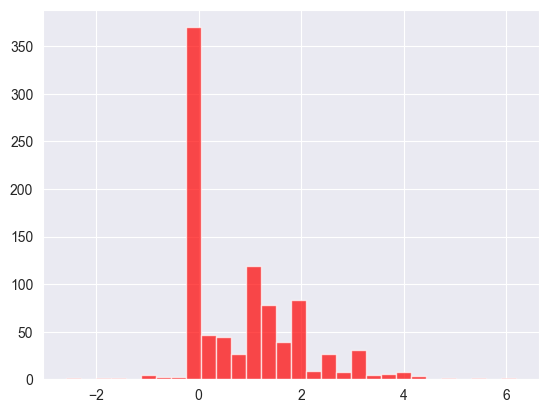

In [77]:
plt.hist(df.Oldpeak, bins=30, color='red', alpha=0.7)

In [ ]:
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = 0  # Replace negative values with 0

In [82]:
df['Oldpeak'] = np.clip(df['Oldpeak'], 0, 3.9)  # Cap values outside the range to lower and upper bounds

Text(0, 0.5, 'Count')

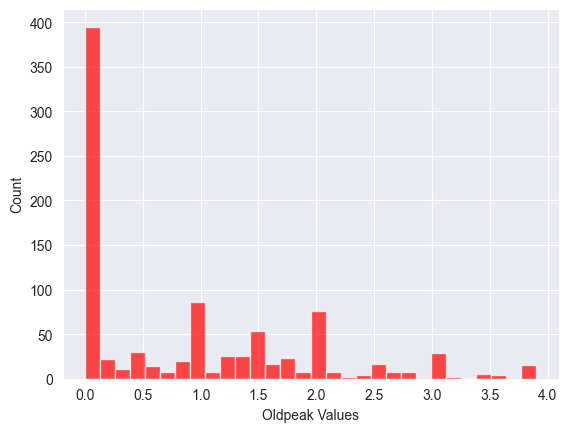

In [84]:
plt.hist(df.Oldpeak, bins=30, color='red', alpha=0.7)
plt.xlabel('Oldpeak Values')
plt.ylabel('Count')

In [30]:
df['Age'].min(), df['Age'].max()

(np.int64(28), np.int64(77))

(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

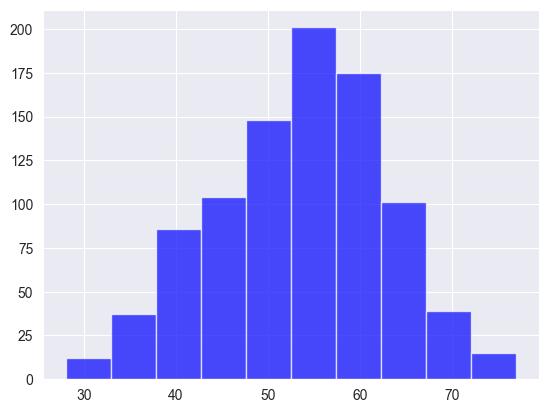

In [21]:
plt.hist(df.Age, bins=10, color='blue', alpha=0.7)